[1.01299131 0.85112505 0.83918398]


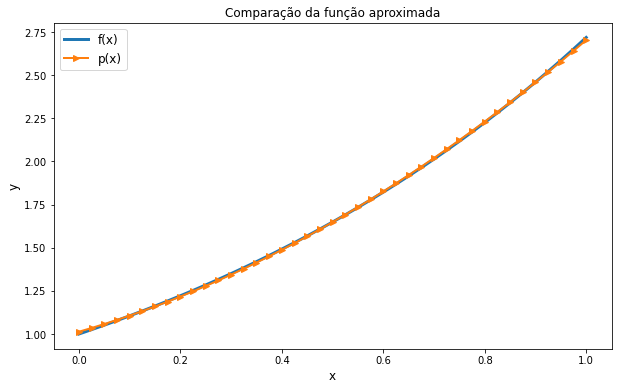

[1.69304514 0.87645706]


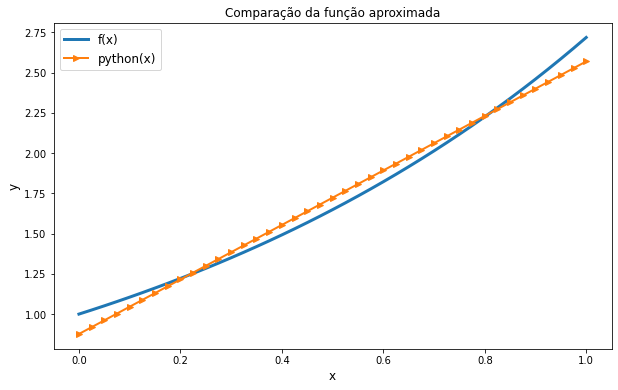

In [ ]:
import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time

def fatoraCholesky(A):

    H = np.tril(A)  
    n = np.shape(H)[0]  
    
    for i in np.arange(n):
        for k in np.arange(i+1):
            tmp_sum = sum(H[i][j] * H[k][j] for j in np.arange(k))
            
            if (i == k):
                H[i][k] = m.sqrt(H[i][k] - tmp_sum)
            else:
                H[i][k] = (1.0 / H[k][k] * (H[i][k] - tmp_sum))
    
    return H

def sub_regressiva(U,y):

    n = np.shape(y)[0]
    x = np.zeros(n)

    for i in np.arange(n-1,-1,-1): 
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]

    return x

def sub_progressiva(L,b):

    n = np.shape(b)[0]
    z = np.zeros(n)

    for i in np.arange(n):
        z[i] = (b[i]-L[i,0:i].dot(z[0:i]))/L[i,i] 

    return z

# f(x) = e^x e p(x) = alpha0 + alpha1 x + alpha2 x^2

A = np.array([[    1.0, 1.0/2.0, 1.0/3.0],  
              [1.0/2.0, 1.0/3.0, 1.0/4.0],
              [1.0/3.0, 1.0/4.0, 1.0/5.0]], dtype='double')
# print(A);

e = np.exp(1);
b = [e-1,1,e-2];
# print(b);

# Usando nossas rotinas
(H) = fatoraCholesky(A)
z = sub_progressiva(H,b)
alpha = sub_regressiva(np.transpose(H),z)
print(alpha)

p = lambda x: alpha[0] + alpha[1]*x + alpha[2]*x**2;
x = np.linspace(0, 1, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'p(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da função aproximada') 
plt.legend(fontsize='large') 
plt.show()

# Vamos aproximar para uma reta usando função do Python
x_data = np.linspace(0,1, num=31, endpoint=True);
y_data = np.exp(x_data);
# print(x_data)
# print(y_data)

A = np.transpose(np.vstack([x_data, np.ones(len(x_data))]))
#print(A)
alpha_python = np.linalg.lstsq(A, y_data, rcond=None)[0];
print(alpha_python)

# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,alpha_python[0]*x+alpha_python[1],label = 'python(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da função aproximada') 
plt.legend(fontsize='large') 
plt.show()